**Preprosesing data**


In [ ]:
from google.colab import drive
import pandas as pd
import numpy as np
# Mount Google Drive
drive.mount('/content/drive')

# Path ke file CSV di Google Drive
data_path = '/content/drive/MyDrive/RainfallsPrediction/data/raw/data1.csv'

# Memuat data dari file CSV
data = pd.read_csv(data_path, encoding='latin-1')

# Menampilkan data
data.head(10)

Mounted at /content/drive


,Tanggal,Tavg (°C),RH_avg (%),RR (mm),ss (jam),ff_avg (m/s)
0,1/1/2000,24.1,69.0,82.0,5.4,2.0
1,2/1/2000,22.9,77.0,0.0,1.2,4.0
2,3/1/2000,23.8,78.0,14.0,4.1,3.0
3,4/1/2000,24.2,77.0,10.0,1.3,2.0
4,5/1/2000,23.4,78.0,8888.0,3.6,4.0
5,6/1/2000,24.0,80.0,2.0,4.6,3.0
6,7/1/2000,22.9,80.0,4.0,3.0,3.0
7,8/1/2000,23.3,76.0,0.0,0.0,2.0
8,9/1/2000,23.0,74.0,2.0,4.1,3.0
9,10/1/2000,22.9,73.0,4.0,4.9,NaN


In [ ]:
# Convert 'Tanggal' to datetime format
data['Tanggal'] = pd.to_datetime(data['Tanggal'], format='%d/%m/%Y')

In [ ]:
#Hitung data hilang
data.isna().sum()

,0
Tanggal,0
Tavg (°C),33
RH_avg (%),36
RR (mm),217
ss (jam),53
ff_avg (m/s),437


In [ ]:
# Handle missing values
data = data.ffill().bfill()

In [ ]:
data.isna().sum()

,0
Tanggal,0
Tavg (°C),0
RH_avg (%),0
RR (mm),0
ss (jam),0
ff_avg (m/s),0


In [ ]:
data

,Tanggal,Tavg (°C),RH_avg (%),RR (mm),ss (jam),ff_avg (m/s)
0,2000-01-01,24.1,69.0,82.0,5.4,2.0
1,2000-01-02,22.9,77.0,0.0,1.2,4.0
2,2000-01-03,23.8,78.0,14.0,4.1,3.0
3,2000-01-04,24.2,77.0,10.0,1.3,2.0
4,2000-01-05,23.4,78.0,8888.0,3.6,4.0
...,...,...,...,...,...,...
8760,2023-12-27,25.9,78.0,25.3,5.5,1.0
8761,2023-12-28,25.4,86.0,29.3,4.5,1.0
8762,2023-12-29,27.1,79.0,27.5,5.4,2.0
8763,2023-12-30,26.1,82.0,1.4,8.7,2.0


In [ ]:
# Fungsi untuk menggantikan outlier menggunakan metode Z-score
from scipy.stats import zscore

def replace_outliers_zscore(df, columns):
    # Iterasi untuk setiap kolom yang akan diperiksa
    for column in columns:
        # Menghitung Z-score untuk kolom yang dipilih
        df['zscore'] = zscore(df[column])
        # Menghitung nilai median dari kolom yang dipilih
        median = df[column].median()
        # Menggantikan nilai yang memiliki Z-score lebih dari 3 dengan nilai median
        df[column] = np.where(np.abs(df['zscore']) > 3, median, df[column])
        # Menghapus kolom zscore setelah selesai
        df.drop(columns='zscore', inplace=True)
    return df

# Daftar kolom yang akan diperiksa outlier-nya
columns_to_check = ['Tavg (°C)', 'RH_avg (%)', 'ss (jam)', 'ff_avg (m/s)', 'RR (mm)']

# Menggantikan outlier di semua kolom yang dipilih
data = replace_outliers_zscore(data, columns_to_check)
data


,Tanggal,Tavg (°C),RH_avg (%),RR (mm),ss (jam),ff_avg (m/s)
0,2000-01-01,24.1,69.0,82.0,5.4,2.0
1,2000-01-02,22.9,77.0,0.0,1.2,4.0
2,2000-01-03,23.8,78.0,14.0,4.1,3.0
3,2000-01-04,24.2,77.0,10.0,1.3,2.0
4,2000-01-05,23.4,78.0,0.0,3.6,4.0
...,...,...,...,...,...,...
8760,2023-12-27,25.9,78.0,25.3,5.5,1.0
8761,2023-12-28,25.4,86.0,29.3,4.5,1.0
8762,2023-12-29,27.1,79.0,27.5,5.4,2.0
8763,2023-12-30,26.1,82.0,1.4,8.7,2.0


In [ ]:
# Menghitung korelasi Pearson
features = data.columns.drop(['Tanggal', 'RR (mm)'])
correlation_matrix = data[features].corrwith(data['RR (mm)'])
print(correlation_matrix.sort_values(ascending=False))

RH_avg (%)      0.326558
Tavg (°C)       0.040954
ff_avg (m/s)   -0.181402
ss (jam)       -0.257047
dtype: float64


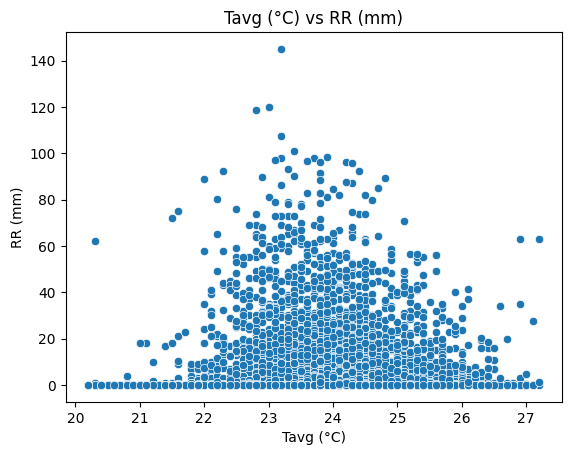

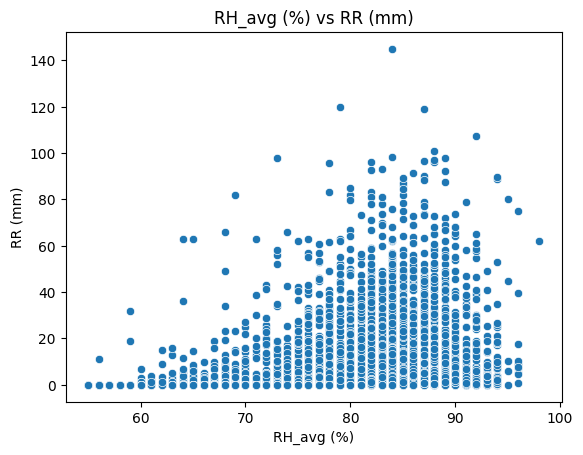

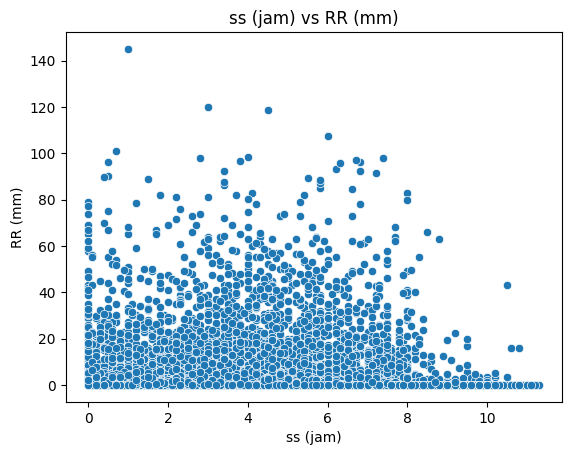

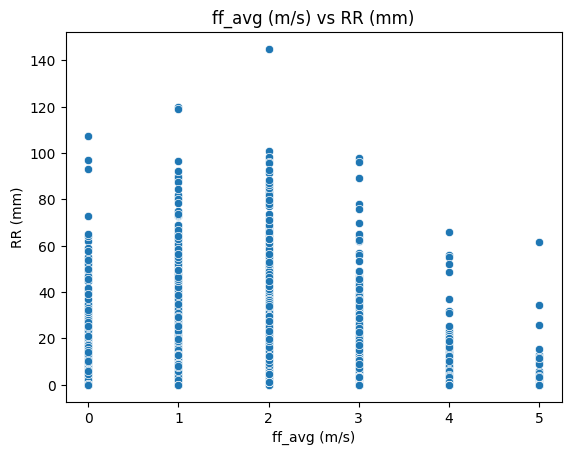

In [ ]:
# Menampilkan scatter plot untuk semua fitur terhadap RR
import matplotlib.pyplot as plt
import seaborn as sns
for feature in features:
    sns.scatterplot(data=data, x=feature, y='RR (mm)')
    plt.title(f'{feature} vs RR (mm)')
    plt.show()

# Menghapus fitur yang kurang berkorelasi 'ss' and 'ff_avg'
data = data.drop(columns=[ 'Tanggal','ss (jam)', 'ff_avg (m/s)',])

# Menyimpan data final ke Google Drive
final_data_path = '/content/drive/MyDrive/RainfallsPrediction/data/processed/final_data.csv'
data.to_csv(final_data_path, index=False)

In [ ]:
# Path ke file CSV di Google Drive
final_data_path = '/content/drive/MyDrive/RainfallsPrediction/data/processed/final_data.csv'

# Memuat data dari file CSV
data = pd.read_csv(final_data_path)

# Menampilkan data
data

,Tavg (°C),RH_avg (%),RR (mm)
0,24.1,69.0,82.0
1,22.9,77.0,0.0
2,23.8,78.0,14.0
3,24.2,77.0,10.0
4,23.4,78.0,0.0
...,...,...,...
8760,25.9,78.0,25.3
8761,25.4,86.0,29.3
8762,27.1,79.0,27.5
8763,26.1,82.0,1.4


In [ ]:
# Normalize data

from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
feature_columns = ['Tavg (°C)', 'RH_avg (%)', 'RR (mm)']
data[feature_columns] = scaler.fit_transform(data[feature_columns])
data.head(7)


,Tavg (°C),RH_avg (%),RR (mm)
0,0.557143,0.325581,0.565517
1,0.385714,0.511628,0.000000
2,0.514286,0.534884,0.096552
3,0.571429,0.511628,0.068966
4,0.457143,0.534884,0.000000
5,0.542857,0.581395,0.013793
6,0.385714,0.581395,0.027586


In [ ]:
# Definisikan jumlah timestep
timesteps = 7

# Fungsi untuk membuat dataset baru dengan lagging berdasarkan timestep
def create_lagged_features(data, timesteps):
    X, y = [], []
    # Loop untuk membuat fitur lagging
    for i in range(len(data) - timesteps):
        # Membuat data input (X) dengan ukuran timestep
        X.append(data[i:(i + timesteps), :])
        # Menentukan target output (y), dalam hal ini curah hujan (RR (mm))
        y.append(data[i + timesteps, -1])  # Target adalah curah hujan (RR (mm))
    return np.array(X), np.array(y)

# Pilih kolom fitur yang akan dilagging, termasuk curah hujan (RR (mm))
features = data[['Tavg (°C)', 'RH_avg (%)', 'RR (mm)']].values

# Buat fitur lagged berdasarkan timestep yang telah ditentukan
X, y = create_lagged_features(features, timesteps)


In [ ]:
print("Shape of X:", X.shape)
print("Shape of y:", y.shape)

Shape of X: (8758, 7, 3)
Shape of y: (8758,)


In [ ]:
from sklearn.model_selection import train_test_split
# Pisahkan data menjadi training (80%) dan temporary (20%)
X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.2, shuffle=False)
# Pisahkan temporary menjadi validation (10%) dan test (10%)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, shuffle=False)

In [ ]:
print("Shape of X_train:", X_train.shape)
print("Shape of y_train:", y_train.shape)
print("Shape of X_val:", X_val.shape)
print("Shape of y_val:", y_val.shape)
print("Shape of X_test:", X_test.shape)
print("Shape of y_test:", y_test.shape)

Shape of X_train: (7006, 7, 3)
Shape of y_train: (7006,)
Shape of X_val: (876, 7, 3)
Shape of y_val: (876,)
Shape of X_test: (876, 7, 3)
Shape of y_test: (876,)


In [ ]:
import numpy as np
import pandas as pd

# Misalkan X_test sudah ada
# Reshape data menjadi bentuk (sequence, timesteps * features)
X_test_flattened = X_test.reshape(X_test.shape[0], -1)
X_test_df = pd.DataFrame(X_test_flattened, columns=[f'Feature_{i}' for i in range(X_test_flattened.shape[1])])

# Simpan ke CSV
X_test_df.to_csv('X_test.csv', index=False)


**Perancangan model**

In [ ]:
from tensorflow.keras.layers import Input, LSTM, Dropout, Dense, Flatten
from tensorflow.keras.models import Model
import tensorflow as tf

# Fungsi untuk membangun model LSTM Standar sesuai Tabel 4.11
def build_model_lstm(activation_function):
    # Input layer: (None, 7, 3)
    inputs = Input(shape=(X_train.shape[1], X_train.shape[2]))

    # LSTM 1: return_sequences=True
    x = LSTM(units=128, activation=activation_function, return_sequences=True)(inputs)
    x = Dropout(rate=0.3)(x)

    # LSTM 2: return_sequences=True (agar output shape tetap (None, 7, 128))
    x = LSTM(units=128, activation=activation_function, return_sequences=True)(x)
    x = Dropout(rate=0.3)(x)

    # Flatten: ubah (None, 7, 128) → (None, 896)
    x = Flatten()(x)

    # Output layer
    output = Dense(1, name='rainfall')(x)

    # Bangun dan kompilasi model
    model = Model(inputs, output)
    model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=1e-3),
                  loss='mean_squared_error',
                  metrics=['mean_squared_error'])

    return model


**Training Model**

In [ ]:
import os
import numpy as np
import pandas as pd
from google.colab import drive
from tensorflow.keras.callbacks import ModelCheckpoint
from tensorflow.keras.models import load_model
import tensorflow as tf

# Mount Google Drive untuk menyimpan model dan hasil pelatihan
drive.mount('/content/drive')

# Membuat folder jika belum ada
folder_path = '/content/drive/MyDrive/RainfallsPrediction'
os.makedirs(folder_path, exist_ok=True)

# Parameter eksperimen
activation_function = 'tanh'
batch_sizes = [4, 16, 32, 64, 128]
epochs_list = [10, 20, 50, 100]

# DataFrame hasil evaluasi
results_df = pd.DataFrame(columns=[
    'Activation', 'Batch Size', 'Epochs',
    'Train MSE', 'Train RMSE',
    'Validation MSE', 'Validation RMSE',
    'Test MSE', 'Test RMSE'
])
histories = {}

# Fungsi simpan/load history training
def save_history_to_csv(history, filename):
    pd.DataFrame(history.history).to_csv(filename, index=False)

def load_history_from_csv(filename):
    return pd.read_csv(filename).to_dict(orient='list')

# Simpan hasil sementara
def save_intermediate_results(df):
    df.to_csv("/content/drive/MyDrive/RainfallsPrediction/model/training_results_lstm.csv", index=False)
    print("✅ Hasil sementara disimpan ke training_results_lstm.csv di Google Drive.")

# Loop pelatihan
for batch_size in batch_sizes:
    for epochs in epochs_list:
        try:
            print(f"=== Training: activation={activation_function}, batch_size={batch_size}, epochs={epochs} ===")

            save_path = f"/content/drive/MyDrive/RainfallsPrediction/model/best_model_lstm_{activation_function}_bs{batch_size}_ep{epochs}.keras"
            history_path = save_path.replace(".keras", ".csv")

            if os.path.exists(save_path) and os.path.exists(history_path):
                print("[INFO] Model dan history ditemukan, memuat...")
                model = load_model(save_path)
                history = tf.keras.callbacks.History()
                history.history = load_history_from_csv(history_path)
                histories[f'{activation_function}_{batch_size}_{epochs}'] = history
            else:
                print("[INFO] Melatih model baru...")
                model = build_model_lstm(activation_function)
                checkpoint = ModelCheckpoint(save_path, monitor='val_loss', save_best_only=True, verbose=1, mode='min')
                history = model.fit(
                    X_train, y_train,
                    epochs=epochs,
                    batch_size=batch_size,
                    validation_data=(X_val, y_val),
                    callbacks=[checkpoint],
                    verbose=0
                )
                save_history_to_csv(history, history_path)
                histories[f'{activation_function}_{batch_size}_{epochs}'] = history

            # Evaluasi Train, Validation, dan Test
            train_mse = model.evaluate(X_train, y_train, verbose=0)[1]
            val_mse = model.evaluate(X_val, y_val, verbose=0)[1]
            test_mse = model.evaluate(X_test, y_test, verbose=0)[1]

            result = pd.DataFrame({
                'Activation': [activation_function],
                'Batch Size': [batch_size],
                'Epochs': [epochs],
                'Train MSE': [train_mse],
                'Train RMSE': [np.sqrt(train_mse)],
                'Validation MSE': [val_mse],
                'Validation RMSE': [np.sqrt(val_mse)],
                'Test MSE': [test_mse],
                'Test RMSE': [np.sqrt(test_mse)]
            })
            results_df = pd.concat([results_df, result], ignore_index=True)
            save_intermediate_results(results_df)

        except Exception as e:
            print(f"[ERROR] Terjadi kesalahan: {e}")
            save_intermediate_results(results_df)

# Simpan akhir
results_df.to_csv("/content/drive/MyDrive/RainfallsPrediction/model/training_results_lstm.csv", index=False)
print("✅ Hasil akhir disimpan ke training_results_lstm.csv")


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
=== Training: activation=tanh, batch_size=4, epochs=10 ===
[INFO] Model dan history ditemukan, memuat...


<ipython-input-18-2775053506>:88: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  results_df = pd.concat([results_df, result], ignore_index=True)


✅ Hasil sementara disimpan ke training_results_lstm.csv di Google Drive.
=== Training: activation=tanh, batch_size=4, epochs=20 ===
[INFO] Model dan history ditemukan, memuat...
✅ Hasil sementara disimpan ke training_results_lstm.csv di Google Drive.
=== Training: activation=tanh, batch_size=4, epochs=50 ===
[INFO] Model dan history ditemukan, memuat...
✅ Hasil sementara disimpan ke training_results_lstm.csv di Google Drive.
=== Training: activation=tanh, batch_size=4, epochs=100 ===
[INFO] Model dan history ditemukan, memuat...
✅ Hasil sementara disimpan ke training_results_lstm.csv di Google Drive.
=== Training: activation=tanh, batch_size=16, epochs=10 ===
[INFO] Model dan history ditemukan, memuat...
✅ Hasil sementara disimpan ke training_results_lstm.csv di Google Drive.
=== Training: activation=tanh, batch_size=16, epochs=20 ===
[INFO] Model dan history ditemukan, memuat...
✅ Hasil sementara disimpan ke training_results_lstm.csv di Google Drive.
=== Training: activation=tanh, bat

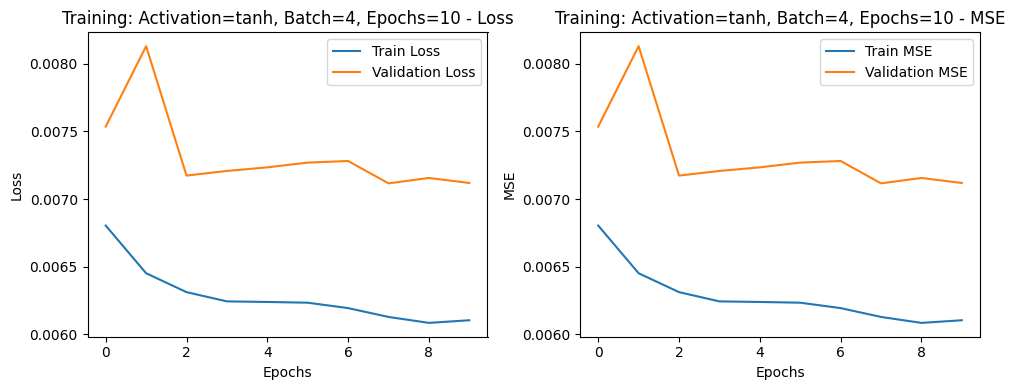

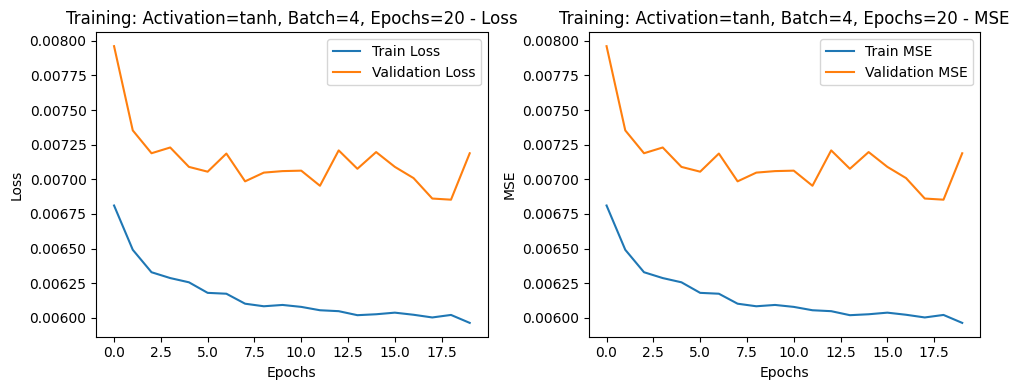

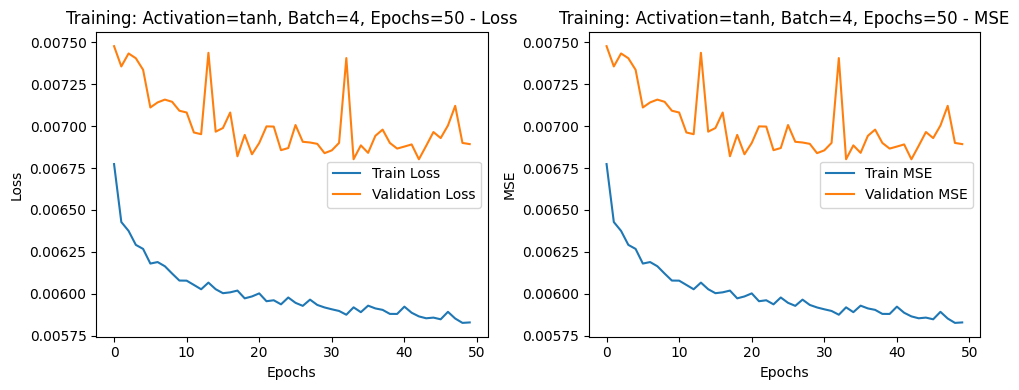

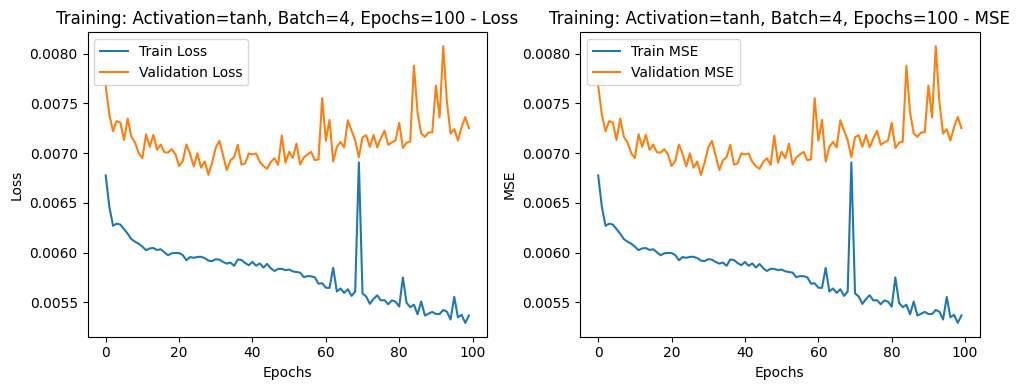

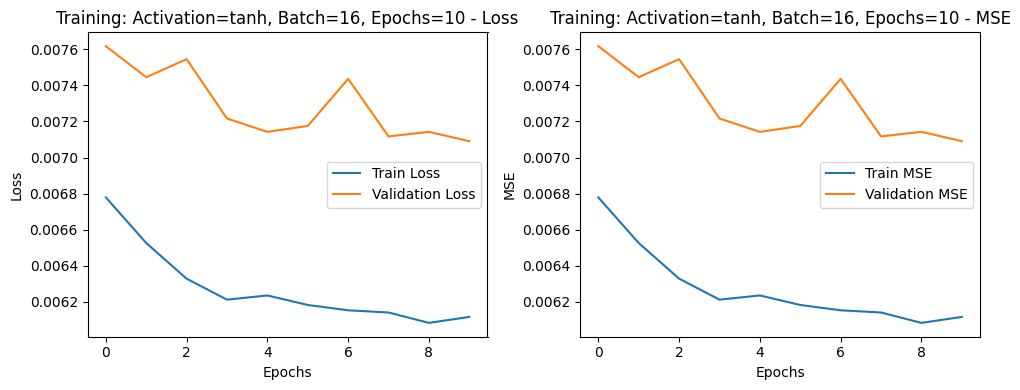

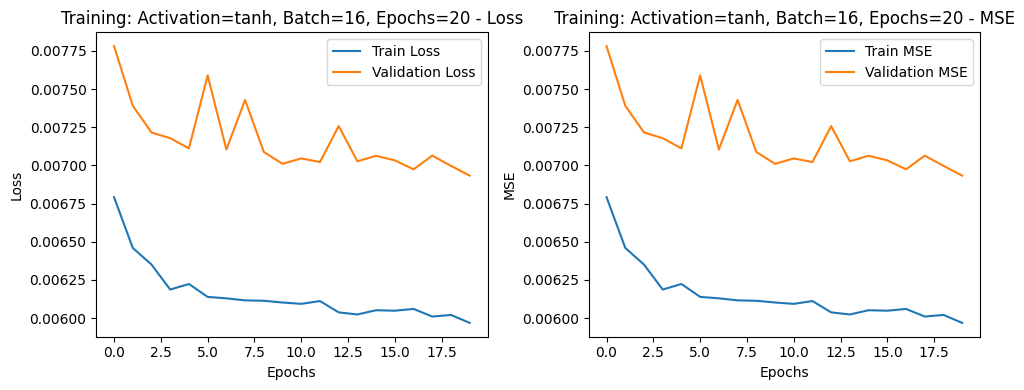

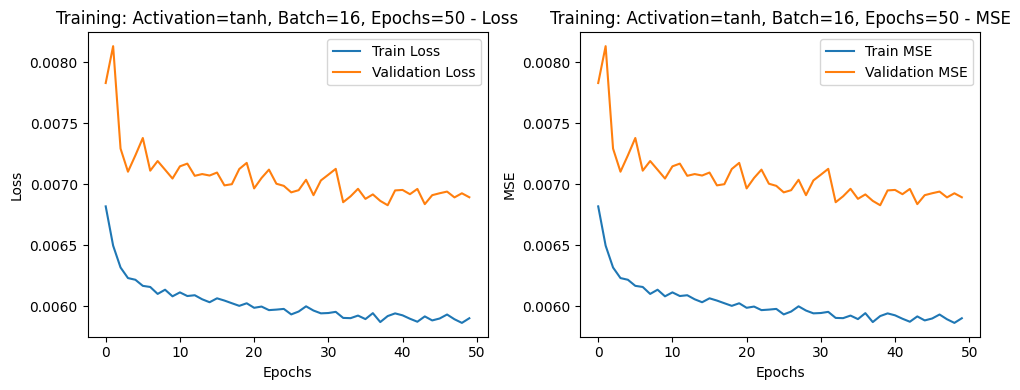

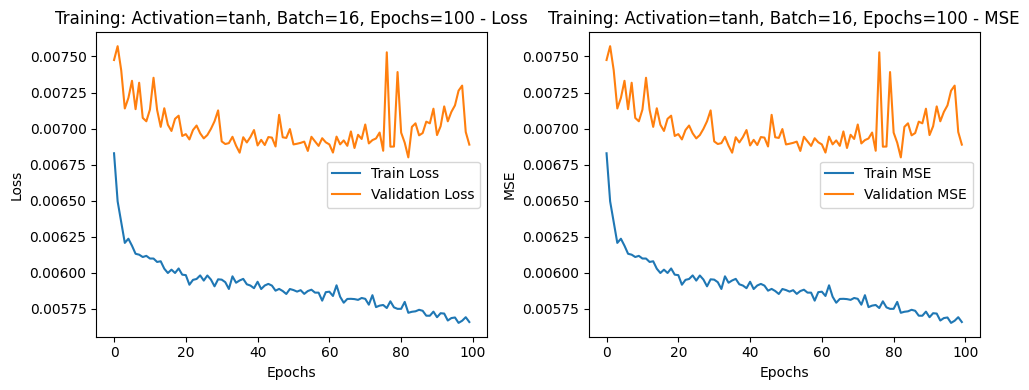

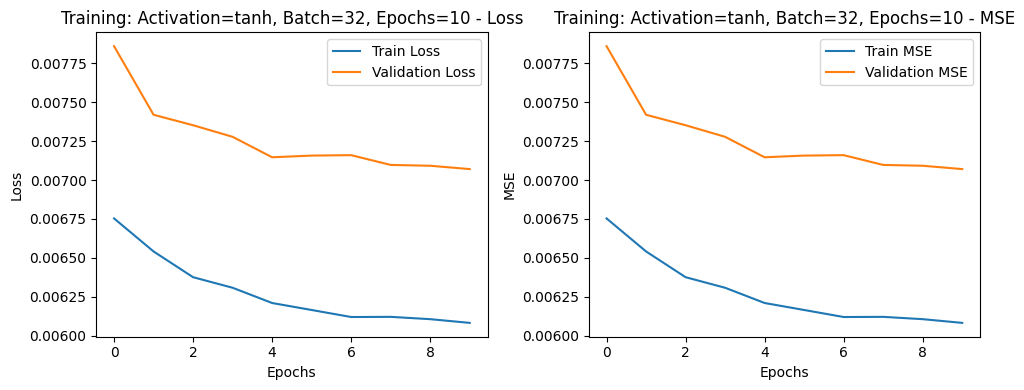

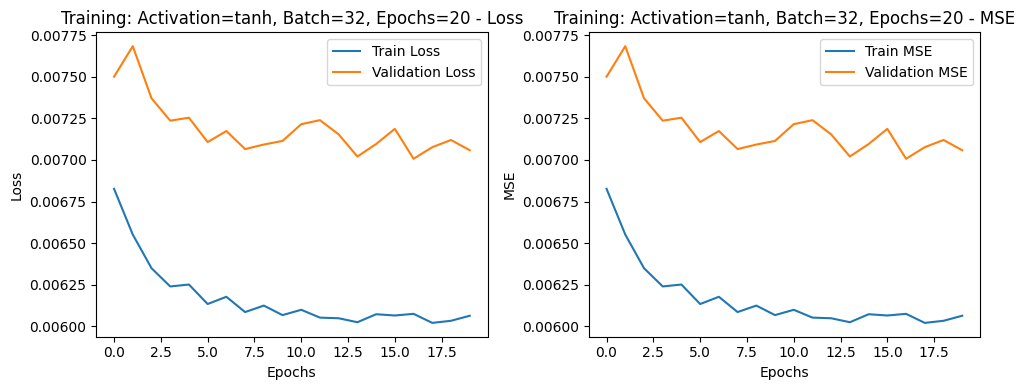

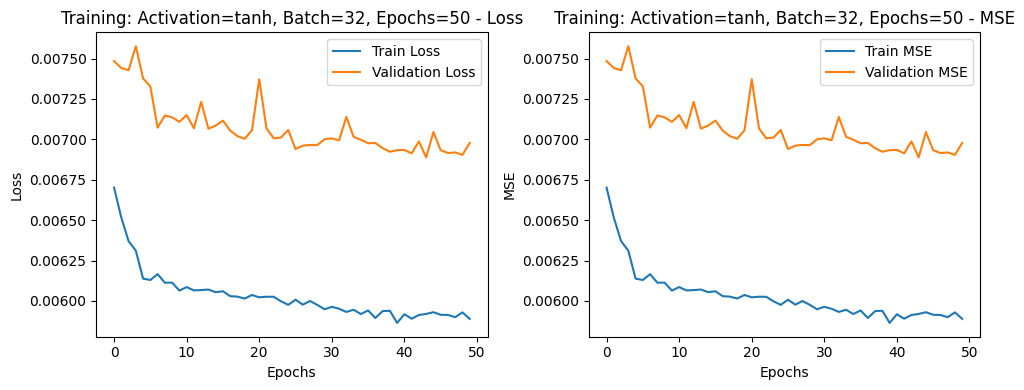

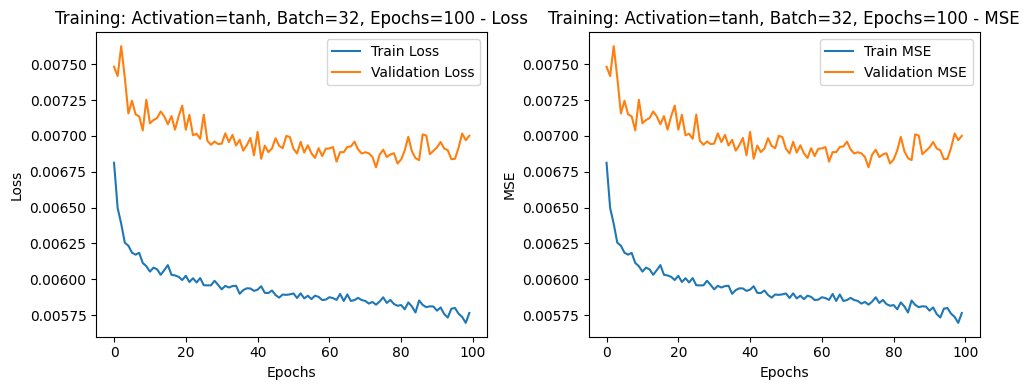

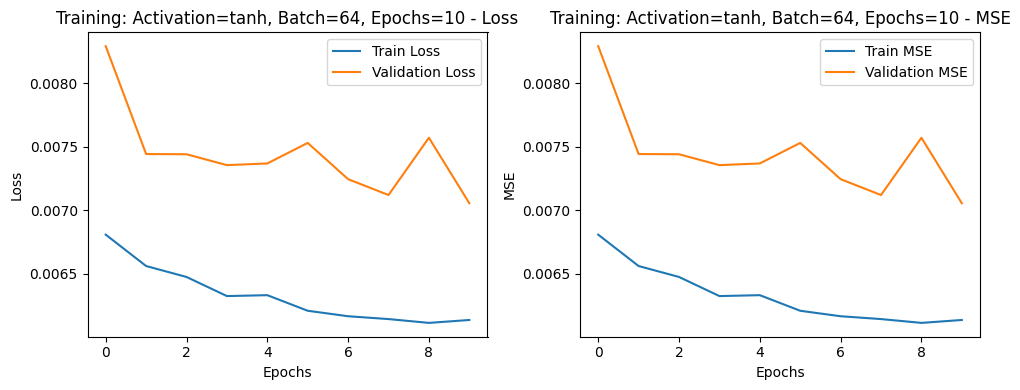

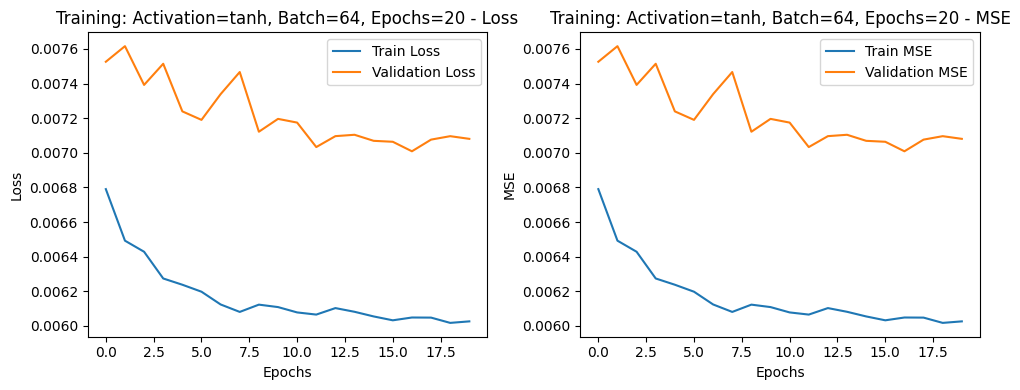

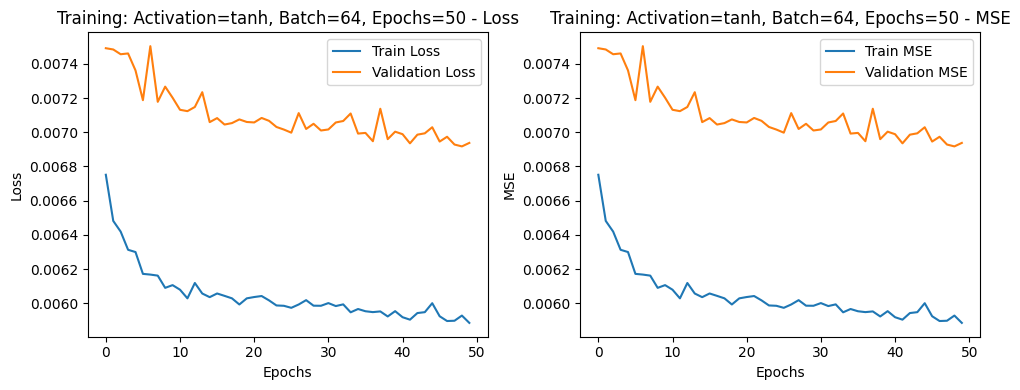

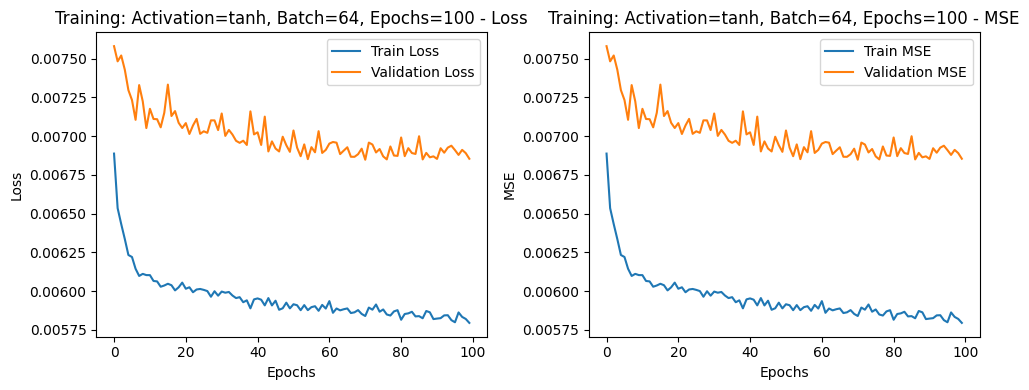

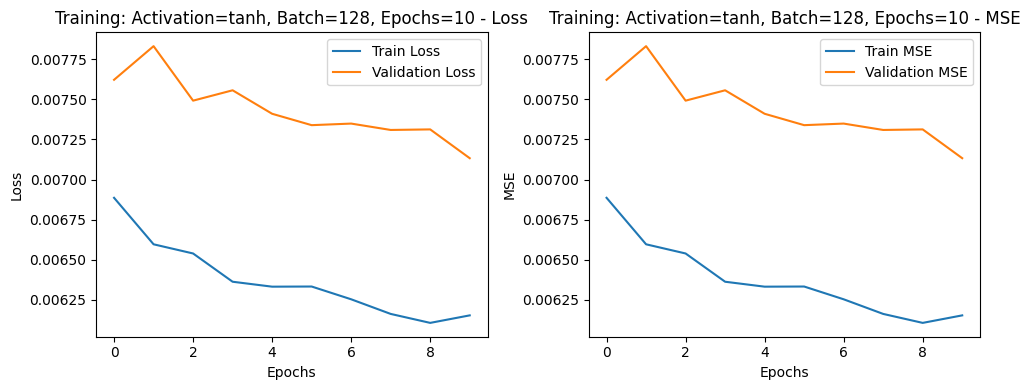

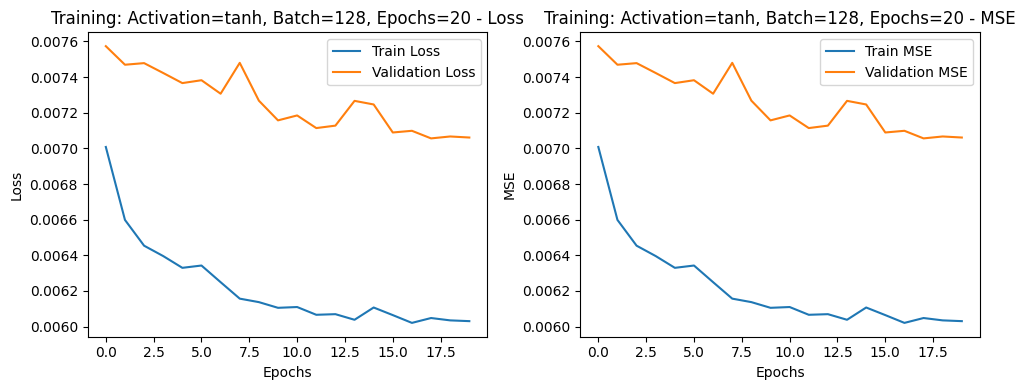

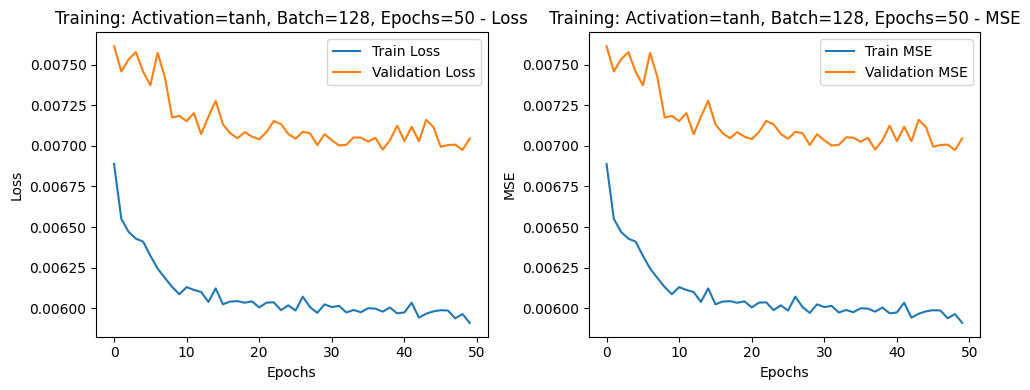

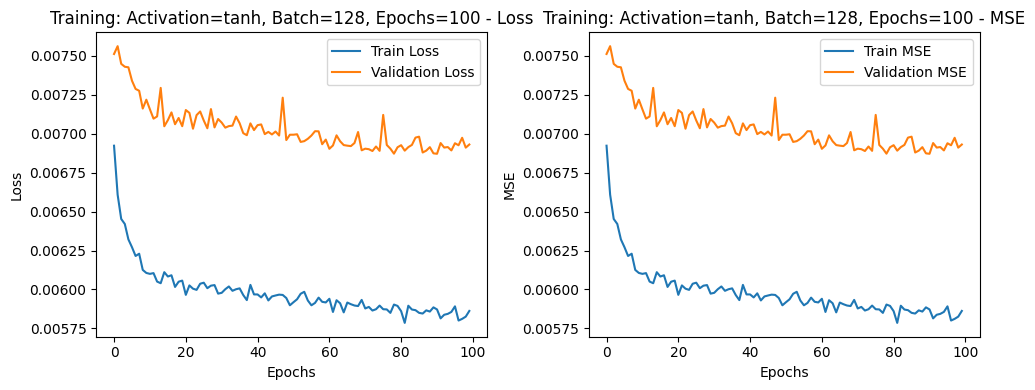

In [ ]:
import matplotlib.pyplot as plt

def visualize_training(history, title="Model Training"):
    plt.figure(figsize=(10, 4))

    # Plot untuk Loss
    plt.subplot(1, 2, 1)
    plt.plot(history.history['loss'], label='Train Loss')
    plt.plot(history.history['val_loss'], label='Validation Loss')
    plt.title(f'{title} - Loss')
    plt.ylabel('Loss')
    plt.xlabel('Epochs')
    plt.legend()

    # Plot untuk Mean Squared Error (MSE)
    plt.subplot(1, 2, 2)
    plt.plot(history.history['mean_squared_error'], label='Train MSE')
    plt.plot(history.history['val_mean_squared_error'], label='Validation MSE')
    plt.title(f'{title} - MSE')
    plt.ylabel('MSE')
    plt.xlabel('Epochs')
    plt.legend()

    plt.tight_layout()
    plt.show()

# Visualisasi hasil pelatihan untuk setiap kombinasi parameter
for key, history in histories.items():
    activation_function, batch_size, epochs = key.split('_')
    visualize_training(history, f"Training: Activation={activation_function}, Batch={batch_size}, Epochs={epochs}")


In [ ]:
# Menampilkan hasil evaluasi untuk setiap kombinasi parameter (termasuk Testing)
print("=== Hasil Evaluasi Model LSTM Standar ===\n")

for i in range(len(results_df)):
    print(f"[Model ke-{i+1}]")
    print(f"  Activation Function : {results_df['Activation'][i]}")
    print(f"  Batch Size          : {results_df['Batch Size'][i]}")
    print(f"  Epochs              : {results_df['Epochs'][i]}")
    print(f"  Train MSE           : {results_df['Train MSE'][i]:.6f}")
    print(f"  Train RMSE          : {results_df['Train RMSE'][i]:.6f}")
    print(f"  Validation MSE      : {results_df['Validation MSE'][i]:.6f}")
    print(f"  Validation RMSE     : {results_df['Validation RMSE'][i]:.6f}")

    # Cek apakah kolom Test MSE dan RMSE tersedia
    if 'Test MSE' in results_df.columns and 'Test RMSE' in results_df.columns:
        print(f"  Test MSE            : {results_df['Test MSE'][i]:.6f}")
        print(f"  Test RMSE           : {results_df['Test RMSE'][i]:.6f}")

    print("-" * 60)


=== Hasil Evaluasi Model LSTM Standar ===

[Model ke-1]
  Activation Function : tanh
  Batch Size          : 4
  Epochs              : 10
  Train MSE           : 0.005943
  Train RMSE          : 0.077092
  Validation MSE      : 0.007116
  Validation RMSE     : 0.084356
  Test MSE            : 0.008177
  Test RMSE           : 0.090427
------------------------------------------------------------
[Model ke-2]
  Activation Function : tanh
  Batch Size          : 4
  Epochs              : 20
  Train MSE           : 0.005783
  Train RMSE          : 0.076044
  Validation MSE      : 0.006853
  Validation RMSE     : 0.082784
  Test MSE            : 0.007876
  Test RMSE           : 0.088748
------------------------------------------------------------
[Model ke-3]
  Activation Function : tanh
  Batch Size          : 4
  Epochs              : 50
  Train MSE           : 0.005689
  Train RMSE          : 0.075427
  Validation MSE      : 0.006802
  Validation RMSE     : 0.082476
  Test MSE            

In [ ]:
# Menentukan model terbaik berdasarkan MSE pada data validasi
best_index = results_df['Validation MSE'].idxmin()
best_result = results_df.loc[best_index]

print("Model terbaik:")
print(best_result)


Model terbaik:
Activation             tanh
Batch Size               32
Epochs                  100
Train MSE          0.005707
Train RMSE         0.075546
Validation MSE     0.006781
Validation RMSE    0.082345
Test MSE           0.007874
Test RMSE          0.088737
Name: 11, dtype: object


In [ ]:
  # Path untuk model dan history terbaik
  from tensorflow.keras.models import load_model
  best_activation = best_result['Activation']
  best_batch_size = best_result['Batch Size']
  best_epochs = best_result['Epochs']

  best_model_path = f"/content/drive/MyDrive/RainfallsPrediction/model/best_model_lstm_{best_activation}_bs{best_batch_size}_ep{best_epochs}.keras"
  best_model = load_model(best_model_path)


In [ ]:
from sklearn.metrics import mean_squared_error
import numpy as np
from tensorflow.keras.models import load_model
import pandas as pd
import os

# Ambil 5 model terbaik berdasarkan Validation MSE
top_5_results = results_df.sort_values(by='Validation MSE').head(5).reset_index(drop=True)

print("Top 5 best models based on Validation MSE:")
print(top_5_results[['Activation', 'Batch Size', 'Epochs', 'Train MSE', 'Train RMSE', 'Validation MSE', 'Validation RMSE']])

# List untuk menyimpan hasil evaluasi ulang
eval_results = []

print("\nEvaluasi ulang model terbaik pada data Training, Validation, dan Testing:")

for i, row in top_5_results.iterrows():
    activation = row['Activation']
    batch_size = row['Batch Size']
    epochs = row['Epochs']
    model_path = f"/content/drive/MyDrive/RainfallsPrediction/model/best_model_lstm_{activation}_bs{batch_size}_ep{epochs}.keras"

    model = load_model(model_path)

    # Prediksi ulang pada data training
    y_train_pred = model.predict(X_train)
    mse_train = mean_squared_error(y_train, y_train_pred)
    rmse_train = np.sqrt(mse_train)

    # Prediksi ulang pada data validasi
    y_val_pred = model.predict(X_val)
    mse_val = mean_squared_error(y_val, y_val_pred)
    rmse_val = np.sqrt(mse_val)

    # Prediksi ulang pada data pengujian
    y_test_pred = model.predict(X_test)
    mse_test = mean_squared_error(y_test, y_test_pred)
    rmse_test = np.sqrt(mse_test)

    print(f"Model {i+1}: Activation={activation}, Batch={batch_size}, Epochs={epochs}")
    print(f"  Training MSE (recalculated)   : {mse_train:.6f}")
    print(f"  Training RMSE (recalculated)  : {rmse_train:.6f}")
    print(f"  Validation MSE (recalculated) : {mse_val:.6f}")
    print(f"  Validation RMSE (recalculated): {rmse_val:.6f}")
    print(f"  Test MSE (recalculated)       : {mse_test:.6f}")
    print(f"  Test RMSE (recalculated)      : {rmse_test:.6f}\n")

    # Simpan hasil evaluasi ke dalam list
    eval_results.append({
        'Model Rank': i+1,
        'Activation': activation,
        'Batch Size': batch_size,
        'Epochs': epochs,
        'Train MSE (recalculated)': mse_train,
        'Train RMSE (recalculated)': rmse_train,
        'Validation MSE (recalculated)': mse_val,
        'Validation RMSE (recalculated)': rmse_val,
        'Test MSE (recalculated)': mse_test,
        'Test RMSE (recalculated)': rmse_test
    })

# Buat DataFrame hasil evaluasi
eval_df = pd.DataFrame(eval_results)

# Simpan ke CSV
save_path = "/content/drive/MyDrive/RainfallsPrediction/model/top_5_models_evaluation_lstm.csv"
eval_df.to_csv(save_path, index=False)

print(f"✅ Hasil evaluasi 5 model terbaik (termasuk data testing) telah disimpan ke:\n{save_path}")


Top 5 best models based on Validation MSE:
  Activation Batch Size Epochs  Train MSE  Train RMSE  Validation MSE  \
0       tanh         32    100   0.005707    0.075546        0.006781   
1       tanh          4    100   0.005760    0.075895        0.006782   
2       tanh         16    100   0.005622    0.074979        0.006800   
3       tanh          4     50   0.005689    0.075427        0.006802   
4       tanh         16     50   0.005773    0.075978        0.006828   

   Validation RMSE  
0         0.082345  
1         0.082351  
2         0.082461  
3         0.082476  
4         0.082629  

Evaluasi ulang model terbaik pada data Training, Validation, dan Testing:
219/219 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step
28/28 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 
28/28 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 
Model 1: Activation=tanh, Batch=32, Epochs=100
  Training MSE (recalculated)   : 0.005707
  Training RMSE (recalculated)  : 0.075546
  Validation MSE (recalculated) : 0.006781
  Validation RMSE (r

**Uji coba Model**

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
Loading best model from /content/drive/MyDrive/RainfallsPrediction/model/best_model_lstm_tanh_bs4_ep10.keras
Test MSE: 0.008177132345736027
Test RMSE: 0.09042749773014858
28/28 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step


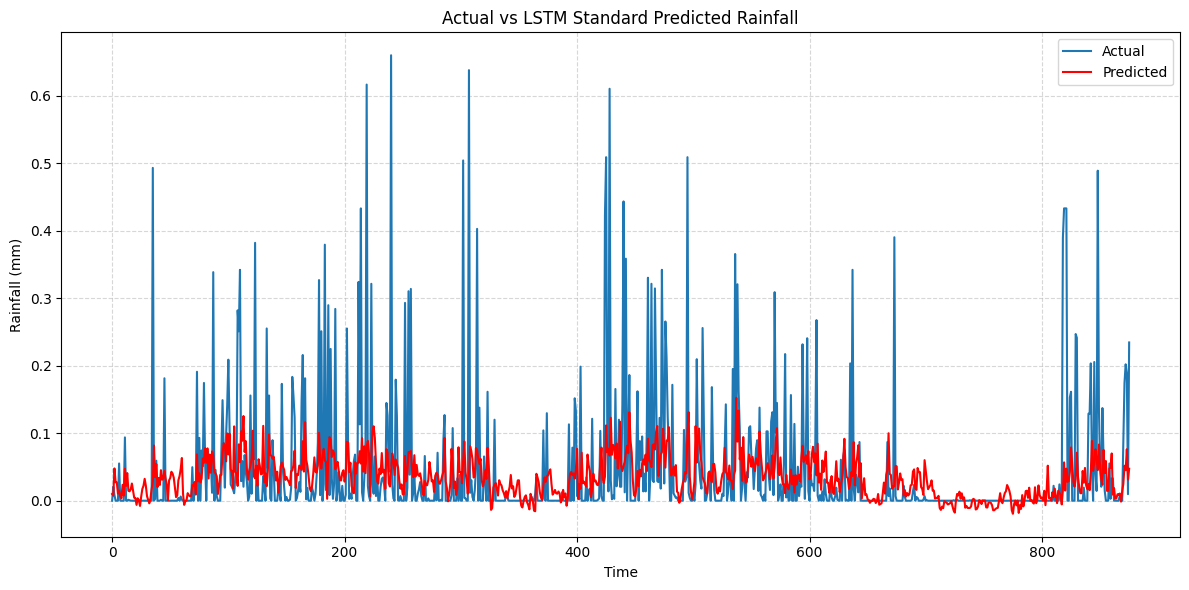

In [ ]:
import pandas as pd
import os
from google.colab import drive
from tensorflow.keras.models import load_model
import numpy as np
import matplotlib.pyplot as plt

# Mount Google Drive
drive.mount('/content/drive')

# Path model terbaik
best_model_path = "/content/drive/MyDrive/RainfallsPrediction/model/best_model_lstm_tanh_bs4_ep10.keras"  # Sesuaikan path dengan model terbaik Anda

# Memuat model terbaik
print(f"Loading best model from {best_model_path}")
best_model = load_model(best_model_path)

# Evaluasi model dengan data uji
test_loss, test_mse = best_model.evaluate(X_test, y_test, verbose=0)
test_rmse = np.sqrt(test_mse)

print(f"Test MSE: {test_mse}")
print(f"Test RMSE: {test_rmse}")

# Prediksi menggunakan model terbaik
y_pred = best_model.predict(X_test)


# Plot actual vs predicted
plt.figure(figsize=(12, 6))
plt.plot(range(len(y_test)), y_test, label='Actual')
plt.plot(range(len(y_pred)), y_pred, label='Predicted', color='red')
plt.xlabel('Time')
plt.ylabel('Rainfall (mm)')
plt.title('Actual vs LSTM Standard Predicted Rainfall')
plt.legend(loc='upper right')
plt.grid(True, linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()


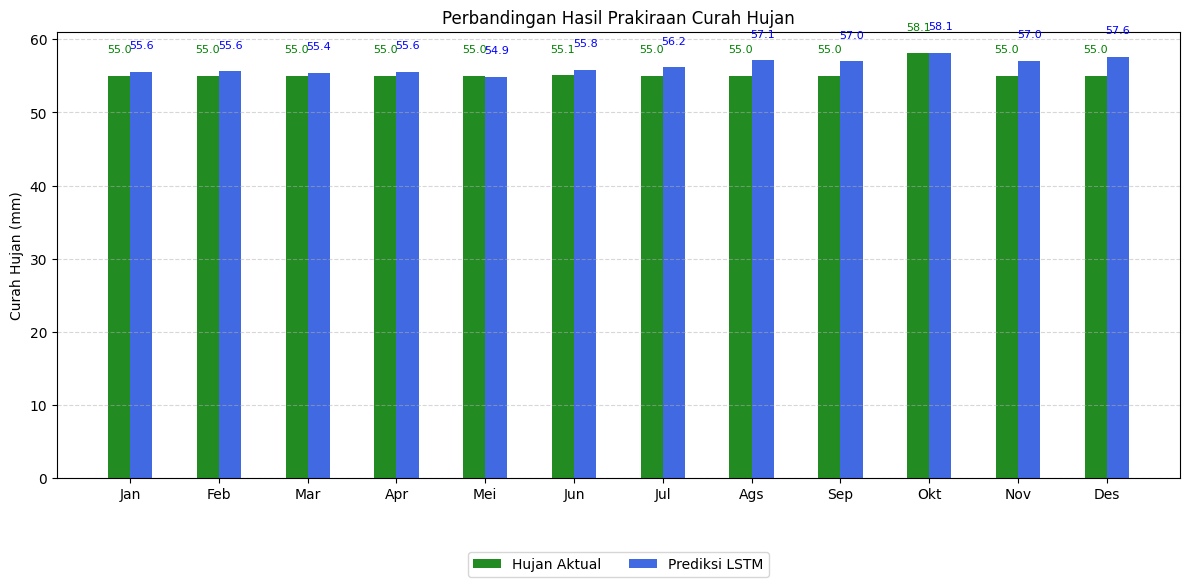

Hujan Aktual (12 bulan terakhir): [55.         55.         55.         55.         55.         55.08896552
 55.         55.         55.         58.1137931  55.         55.        ]
Prediksi LSTM (12 bulan terakhir): [55.56839357 55.6400568  55.43080549 55.55709634 54.88772956 55.8373892
 56.17450976 57.12571673 56.96777524 58.13772038 57.04052102 57.615691  ]


In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# Asumsi: y_val, y_pred, dan scaler sudah tersedia dari proses sebelumnya

# Pastikan y_val dan y_pred adalah array 1D
y_val = y_val.flatten()
y_pred = y_pred.flatten()

# Jumlah fitur saat scaler di-fit (misal 3 kolom)
n_features = 3
target_index = 1  # indeks kolom target

# Buat dummy array untuk inverse transform
y_val_dummy = np.zeros((len(y_val), n_features))
y_pred_dummy = np.zeros((len(y_pred), n_features))

# Isi kolom target dengan data y_val dan y_pred
y_val_dummy[:, target_index] = y_val
y_pred_dummy[:, target_index] = y_pred

# Inverse transform seluruh data dummy array
y_val_inverse_full = scaler.inverse_transform(y_val_dummy)
y_pred_inverse_full = scaler.inverse_transform(y_pred_dummy)

# Ambil hasil inverse transform pada kolom target
y_val_inverse = y_val_inverse_full[:, target_index]
y_pred_inverse = y_pred_inverse_full[:, target_index]

# Ambil 12 data terakhir untuk plotting
y_val_sample = y_val_inverse[-12:]
y_pred_sample = y_pred_inverse[-12:]

# Daftar bulan untuk sumbu x
bulan = ['Jan', 'Feb', 'Mar', 'Apr', 'Mei', 'Jun', 'Jul', 'Ags', 'Sep', 'Okt', 'Nov', 'Des']
x = np.arange(len(bulan))
width = 0.25

# Plot perbandingan hasil
plt.figure(figsize=(12, 6))
plt.bar(x - width/2, y_val_sample, width, label='Hujan Aktual', color='forestgreen')
plt.bar(x + width/2, y_pred_sample, width, label='Prediksi LSTM', color='royalblue')

# Tambahkan label nilai di atas batang dengan offset dinamis
offset = 0.05 * max(max(y_val_sample), max(y_pred_sample))

for i, val in enumerate(y_val_sample):
    plt.text(x[i] - width/2, val + offset, f"{val:.1f}", ha='center', va='bottom', fontsize=8, color='green')

for i, val in enumerate(y_pred_sample):
    plt.text(x[i] + width/2, val + offset, f"{val:.1f}", ha='center', va='bottom', fontsize=8, color='blue')

plt.xticks(x, bulan)
plt.ylabel("Curah Hujan (mm)")
plt.title("Perbandingan Hasil Prakiraan Curah Hujan")
plt.legend(loc='upper center', bbox_to_anchor=(0.5, -0.15), ncol=2)
plt.tight_layout()
plt.grid(axis='y', linestyle='--', alpha=0.5)
plt.show()

print("Hujan Aktual (12 bulan terakhir):", y_val_sample)
print("Prediksi LSTM (12 bulan terakhir):", y_pred_sample)
